In [1]:
import nltk
import pandas as pd
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df=pd.read_csv("moviereviews.tsv",sep="\t")

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [4]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [7]:
sid=SentimentIntensityAnalyzer()

In [8]:
df["predication"]=df['review'].apply(lambda x:'pos' if sid.polarity_scores(x)['compound']>0 else 'neg')

In [9]:
df.head()

,label,review,predication
0,neg,how do films like mouse hunt get into theatres...,neg
1,neg,some talented actresses are blessed with a dem...,neg
2,pos,this has been an extraordinary year for austra...,pos
3,pos,according to hollywood movies made in last few...,pos
4,neg,my first press screening of 1998 and already i...,neg


In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [11]:
accuracy_score(df['label'],df['predication'])

0.6340966921119593

In [12]:
cm=confusion_matrix(df['label'],df['predication'])

In [19]:
print(cm)

[[441 542]
 [177 805]]


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

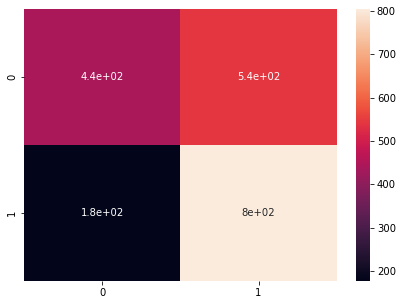

In [14]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)

In [17]:
print(classification_report(df['label'],df['predication']))

              precision    recall  f1-score   support

         neg       0.71      0.45      0.55       983
         pos       0.60      0.82      0.69       982

    accuracy                           0.63      1965
   macro avg       0.66      0.63      0.62      1965
weighted avg       0.66      0.63      0.62      1965

